In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
def f(x:float,y:float):
    return x**2 + y**2 / 5.0

In [4]:
def get_gradients(x:float,y:float):
    return 2*x, 2*y  / 5.0

In [5]:
def get_numerical_gradients(func, x,y, e=0.000000001):
    return (func(x+e, y) - func(x-e, y)) / (2*e),  (func(x, y+e) - func(x, y-e)) / (2*e)

In [6]:
iterations=100
init_x, init_y = 10,10
LR=0.01

In [7]:
def sgd_step(func, x,y, lr=LR):
    x_grad, y_grad = get_numerical_gradients(func,x,y)
    return x - lr* x_grad, y - lr * y_grad

def momentum_step(func, x,y, v_x, v_y, lr=LR, gamma=0.9):
    x_grad, y_grad = get_numerical_gradients(func,x,y)
    v_x = gamma * v_x  + lr * x_grad
    v_y = gamma * v_y +lr * y_grad
    x = x - v_x
    y = y - v_y
    return x, y, v_x, v_y

def nesterov_step():pass

In [8]:
get_gradients(2,5)

(4, 2.0)

In [9]:
get_numerical_gradients(f,2,5)

(4.000000330961484, 2.000000165480742)

In [10]:
class Simulator(object):
    def __init__(self, iterations, init_x, init_y, func, lr):
        self.init_x  = init_x
        self.init_y = init_y
        self.iterations = iterations
        self.func = func
        self.f_values = [self.func(self.init_x, self.init_y)]
        self.x_values = [init_x]
        self.y_values = [init_y]
        self.lr = lr
        self.x = init_x
        self.y = init_y
    def step(self):
        raise NotImplementedError
    
    def simulate(self):
        for it in range(self.iterations):
            self.step()


In [11]:
class SGDSimulator(Simulator):
    def __init__(self, iterations, init_x, init_y, func, lr):
        super(SGDSimulator,self).__init__(iterations, init_x, init_y, func, lr)
    
    def step(self):
        self.x,self.y = sgd_step(self.func,self.x,self.y)
        self.x_values.append(self.x)
        self.y_values.append(self.y )
        loss = self.func(self.x,self.y)
        self.f_values.append(loss)
        

In [12]:
class MomentumSimulator(Simulator):
    def __init__(self, iterations, init_x, init_y, func, lr, gamma=0.9):
        super(MomentumSimulator,self).__init__(iterations, init_x, init_y, func, lr)
        self.gamma = gamma
        self.v_x = 0.0
        self.v_y = 0.0
    
    def step(self):
        self.x,self.y, self.v_x, self.v_y = momentum_step(self.func,self.x,self.y, self.v_x, self.v_y)
        self.x_values.append(self.x)
        self.y_values.append(self.y )
        loss = self.func(self.x,self.y)
        self.f_values.append(loss)

In [13]:
momentum = MomentumSimulator(iterations=iterations,init_x=init_x,init_y=init_y,func=f,lr=LR)
momentum.simulate()

In [14]:
sgd = SGDSimulator(iterations=iterations,init_x=init_x,init_y=init_y,func=f,lr=LR)
sgd.simulate()

In [15]:
sgd.x_values

[10,
 9.799999983451926,
 9.603999967234813,
 9.411920015290889,
 9.223681470539304,
 9.039207807527418,
 8.85842370872524,
 8.681255206633978,
 8.507630110111677,
 8.33747750699331,
 8.170727977253591,
 8.007313379844163,
 7.847167136910684,
 7.690223736412918,
 7.536419229504645,
 7.385690804208025,
 7.237976998576414,
 7.093217416477273,
 6.951353082863534,
 6.812325946393685,
 6.6760793768116855,
 6.542557774148463,
 6.411706639776185,
 6.283472505353984,
 6.15780307493651,
 6.034646976283966,
 5.913954045079208,
 5.795674934129238,
 5.679761397582297,
 5.56616614881932,
 5.4548428249268,
 5.345745951169647,
 5.238831047572603,
 5.134054415757419,
 5.031373316578538,
 4.930745828014551,
 4.832130916222468,
 4.735488293429171,
 4.6407784889856885,
 4.547962920421469,
 4.457003680281559,
 4.36786360718088,
 4.280506321331359,
 4.194896153487662,
 4.110998216001462,
 4.028778242949329,
 3.9482026789505653,
 3.8692386258765055,
 3.791853860614083,
 3.7160167817751244,
 3.64169642745991

<IPython.core.display.Javascript object>


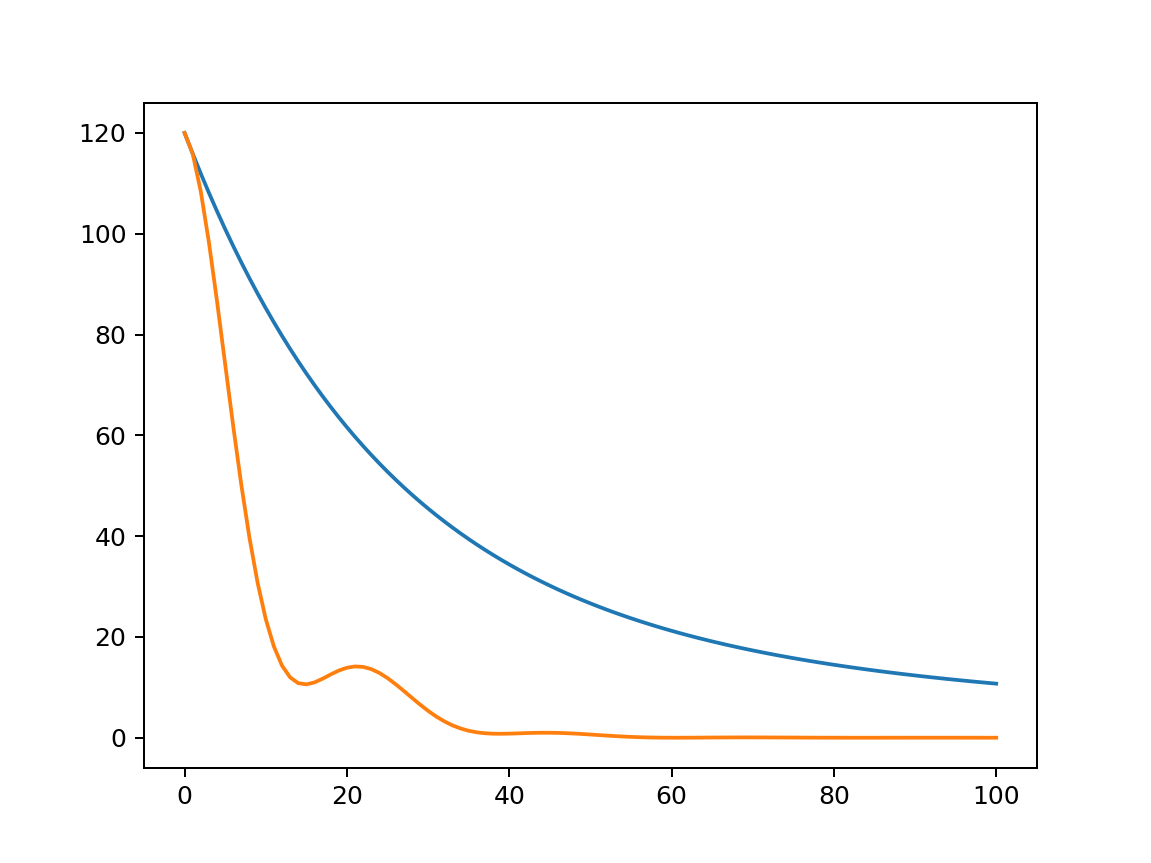

In [16]:
plt.plot(sgd.f_values, label='SGD')
plt.plot(momentum.f_values, label='Momentum')
# plt.show()

<IPython.core.display.Javascript object>


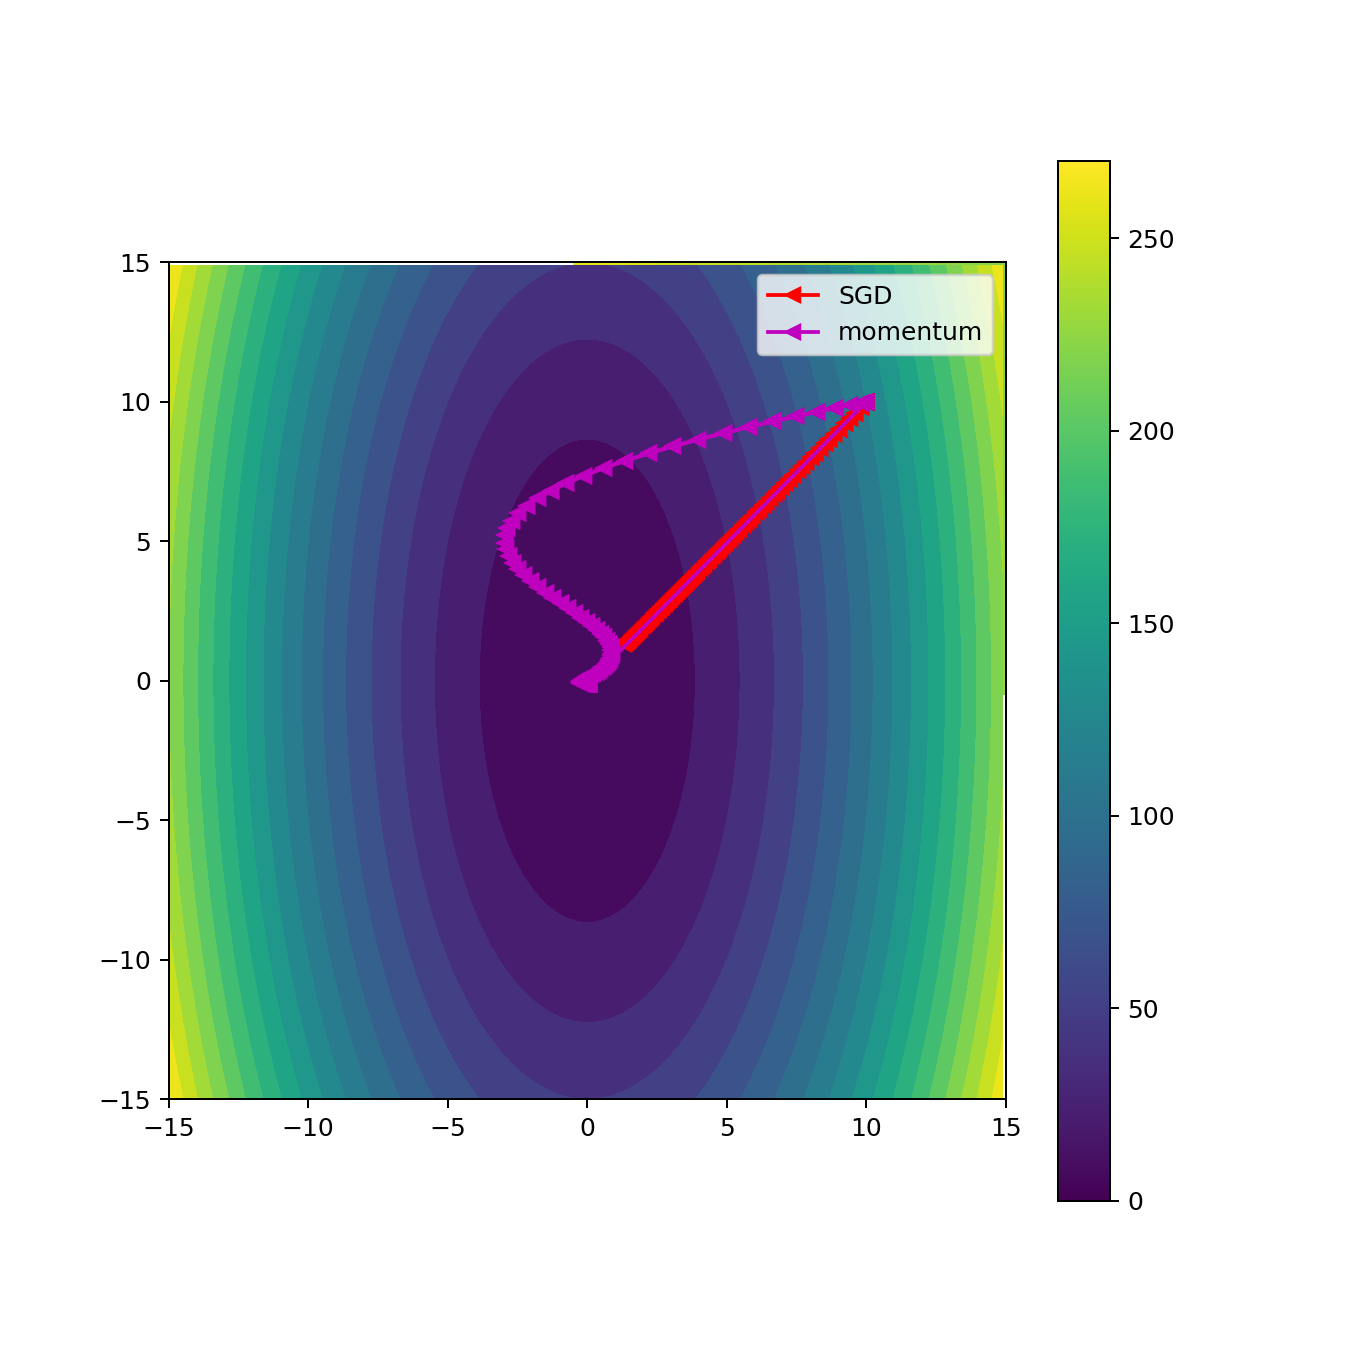

In [17]:
X,Y = np.meshgrid(np.arange(-15,15,0.1), np.arange(-15,15,0.1))
Z = f(X,Y)

x_sgd_anim = []
y_sgd_anim = []
x_momentum_anim = []
y_momentum_anim = []
fig, ax = plt.subplots()
fig.set_size_inches(7.5, 7.5)
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
line, = ax.plot(0, 0, marker='<', label='SGD', color='r')
line2, = ax.plot(0, 0, marker='<', label='momentum', color='m')
#sct = ax.scatter([0.0], [0.0], label='Optimal', color='g')
plt.legend()
ax.contourf(X,Y, Z, levels=20)

def animation_frame(i):
    x_sgd_anim.append(i[0])
    y_sgd_anim.append(i[1])
    x_momentum_anim.append(i[2])
    y_momentum_anim.append(i[3])
    line.set_xdata(x_sgd_anim)
    line.set_ydata(x_sgd_anim)
    line2.set_xdata(x_momentum_anim)
    line2.set_ydata(y_momentum_anim)    
    return line,line2, #sct,

# frames = np.array([[x,y,z,w] for x,y,z,w in zip(x_sgd, y_sgd, x_mom,y_mom)] )
frames = np.array([[x,y,z,w] for x,y,z,w in zip(sgd.x_values, sgd.y_values, momentum.x_values,momentum.y_values)] )
animation = FuncAnimation(fig, func=animation_frame, frames=frames, interval=100)

plt.imshow(Z)
plt.colorbar()
plt.show()

